In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew

## Reading Data

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
Id            100000 non-null int64
Open Date     100000 non-null object
City          100000 non-null object
City Group    100000 non-null object
Type          100000 non-null object
P1            100000 non-null int64
P2            100000 non-null float64
P3            100000 non-null float64
P4            100000 non-null float64
P5            100000 non-null int64
P6            100000 non-null int64
P7            100000 non-null int64
P8            100000 non-null int64
P9            100000 non-null int64
P10           100000 non-null int64
P11           100000 non-null int64
P12           100000 non-null int64
P13           100000 non-null float64
P14           100000 non-null int64
P15           100000 non-null int64
P16           100000 non-null int64
P17           100000 non-null int64
P18           100000 non-null int64
P19           100000 non-null int64
P20           

#### checking Train & Test dataframe

In [5]:
train_df["Open Date"].nunique()

134

In [6]:
test_df["Open Date"].nunique()

310

In [8]:
print(train_df["City"].nunique())
print(train_df["City"].unique())

34
['İstanbul' 'Ankara' 'Diyarbakır' 'Tokat' 'Gaziantep' 'Afyonkarahisar'
 'Edirne' 'Kocaeli' 'Bursa' 'İzmir' 'Sakarya' 'Elazığ' 'Kayseri'
 'Eskişehir' 'Şanlıurfa' 'Samsun' 'Adana' 'Antalya' 'Kastamonu' 'Uşak'
 'Muğla' 'Kırklareli' 'Konya' 'Karabük' 'Tekirdağ' 'Denizli' 'Balıkesir'
 'Aydın' 'Amasya' 'Kütahya' 'Bolu' 'Trabzon' 'Isparta' 'Osmaniye']


In [9]:
print(test_df["City"].nunique())
print(test_df["City"].unique())

57
['Niğde' 'Konya' 'Ankara' 'Kocaeli' 'Afyonkarahisar' 'Eskişehir' 'Rize'
 'İstanbul' 'Trabzon' 'Antalya' 'Muğla' 'Düzce' 'Adana' 'Bursa' 'Aydın'
 'Hatay' 'Denizli' 'İzmir' 'Gaziantep' 'Samsun' 'Erzurum' 'Edirne'
 'Balıkesir' 'Mersin' 'Zonguldak' 'Malatya' 'Çanakkale' 'Kars' 'Bolu'
 'Batman' 'Bilecik' 'Giresun' 'Tekirdağ' 'Sivas' 'Kırıkkale' 'Mardin'
 'Erzincan' 'Manisa' 'Diyarbakır' 'Kahramanmaraş' 'Yalova' 'Tanımsız'
 'Sakarya' 'Kırşehir' 'Aksaray' 'Kayseri' 'Nevşehir' 'Çorum' 'Ordu'
 'Kırklareli' 'Şanlıurfa' 'Artvin' 'Uşak' 'Kütahya' 'Siirt' 'Çankırı'
 'Isparta']


In [9]:
train_df["City Group"].unique()

array(['Big Cities', 'Other'], dtype=object)

In [10]:
test_df["City Group"].unique()

array(['Other', 'Big Cities'], dtype=object)

In [10]:
print(train_df["City Group"].unique())
print(test_df["City Group"].unique())

['Big Cities' 'Other']
['Other' 'Big Cities']


In [11]:
train_df["Type"].unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [12]:
test_df["Type"].unique()

array(['FC', 'IL', 'DT', 'MB'], dtype=object)

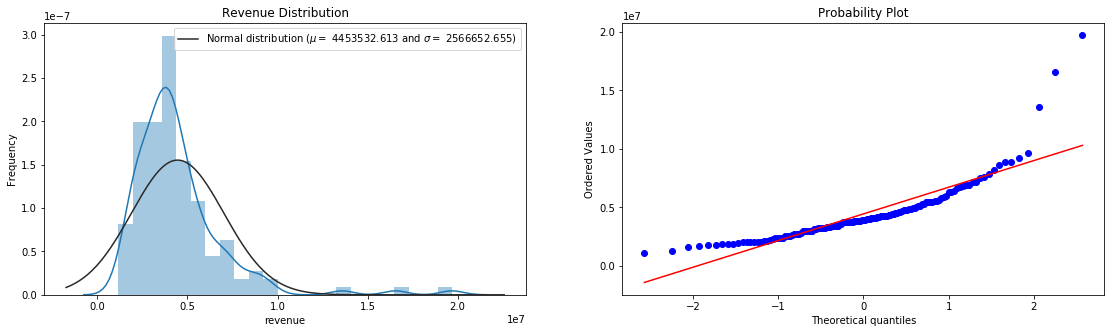

In [6]:
(mu, sigma) = norm.fit(train_df['revenue'])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(train_df['revenue'] , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Revenue Distribution')
ax2 = stats.probplot(train_df['revenue'], plot=plt)
f.show()

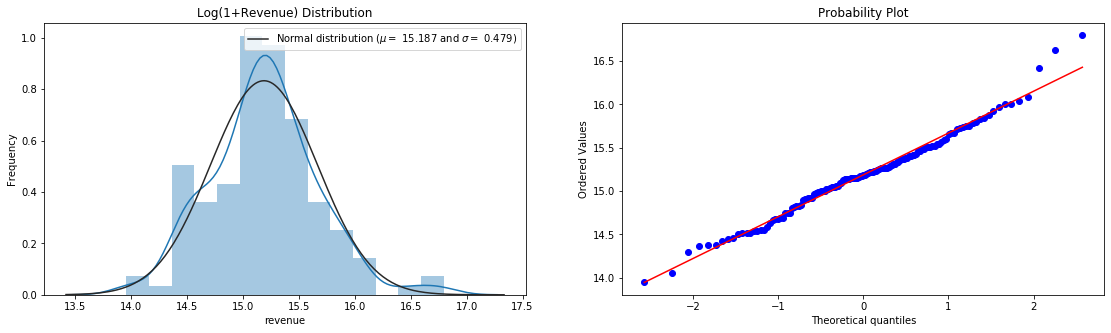

In [7]:
# Revenue is right skewed, taking the log will make it more normally distributed for the linear models
# Remember to use expm1 on predictions to transform back to dollar amount
(mu, sigma) = norm.fit(np.log1p(train_df['revenue']))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(np.log1p(train_df['revenue']) , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Log(1+Revenue) Distribution')
ax2 = stats.probplot(np.log(train_df['revenue']), plot=plt)
f.show()

## Pre Processing Data

In [13]:
# split "Open Date" into Date - Month - Year

train_df["Open Date"] = pd.to_datetime(train_df["Open Date"])
train_df["Day"] = train_df["Open Date"].dt.day
train_df["Month"] = train_df["Open Date"].dt.month
train_df["Year"] = train_df["Open Date"].dt.year
train_df = train_df.drop(["Open Date"], axis=1)

test_df["Open Date"] = pd.to_datetime(test_df["Open Date"])
test_df["Day"] = test_df["Open Date"].dt.day
test_df["Month"] = test_df["Open Date"].dt.month
test_df["Year"] = test_df["Open Date"].dt.year
test_df = test_df.drop(["Open Date"], axis=1)

In [14]:
# One Hot Encoding "City Group"

onehot_citygroup_train = pd.get_dummies(train_df["City Group"], prefix="City_Group")
train_df = train_df.drop(["City Group"], axis=1)
train_df = train_df.join(onehot_citygroup_train)

onehot_citygroup_test = pd.get_dummies(test_df["City Group"], prefix="City_Group")
test_df = test_df.drop(["City Group"], axis=1)
test_df = test_df.join(onehot_citygroup_test)

In [15]:
# One Hot "Type" = IL, FC, DT, Others

type_IL = [1 if i == "IL" else 0 for i in train_df["Type"]]
type_FC = [1 if i == "FC" else 0 for i in train_df["Type"]]
type_DT = [1 if i == "DT" else 0 for i in train_df["Type"]]
type_Others = [1 if i != "IL" and i != "FC" and i != "DT" else 0 for i in train_df["Type"]]
train_df["Type_IL"] = type_IL
train_df["Type_FC"] = type_FC
train_df["Type_DT"] = type_DT
train_df["Type_Others"] = type_Others
train_df = train_df.drop(["Type"], axis=1)

type_IL = [1 if i == "IL" else 0 for i in test_df["Type"]]
type_FC = [1 if i == "FC" else 0 for i in test_df["Type"]]
type_DT = [1 if i == "DT" else 0 for i in test_df["Type"]]
type_Others = [1 if i != "IL" and i != "FC" and i != "DT" else 0 for i in test_df["Type"]]
test_df["Type_IL"] = type_IL
test_df["Type_FC"] = type_FC
test_df["Type_DT"] = type_DT
test_df["Type_Others"] = type_Others
test_df = test_df.drop(["Type"], axis=1)

In [16]:
# # Drop City with too vary in values

# train_df = train_df.drop(["City"], axis=1)
# test_df = test_df.drop(["City"], axis=1)



# Temporary Cat Values on City Train DF

train_df["City"] = pd.Categorical(train_df["City"]).codes
test_df["City"] = pd.Categorical(test_df["City"]).codes

In [17]:
X = train_df.drop(["revenue"], axis=1)
y = train_df["revenue"]
for col in X.columns:
    X[col] = X[col].astype(int)
train_df = X.join(y)

for col in test_df.columns:
    test_df[col] = test_df[col].astype(int)

In [18]:
train_df.head()

,Id,City,P1,P2,P3,P4,P5,P6,P7,P8,...,Day,Month,Year,City_Group_Big Cities,City_Group_Other,Type_IL,Type_FC,Type_DT,Type_Others,revenue
0,0,31,4,5,4,4,2,2,5,4,...,17,7,1999,1,0,1,0,0,0,5653753.0
1,1,3,4,5,4,4,1,2,5,5,...,14,2,2008,1,0,0,1,0,0,6923131.0
2,2,10,2,4,2,5,2,3,5,5,...,9,3,2013,0,1,1,0,0,0,2055379.0
3,3,28,6,4,6,6,4,4,10,8,...,2,2,2012,0,1,1,0,0,0,2675511.0
4,4,14,3,4,3,4,2,2,5,5,...,9,5,2009,0,1,1,0,0,0,4316715.0


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 49 columns):
Id                       137 non-null int32
City                     137 non-null int32
P1                       137 non-null int32
P2                       137 non-null int32
P3                       137 non-null int32
P4                       137 non-null int32
P5                       137 non-null int32
P6                       137 non-null int32
P7                       137 non-null int32
P8                       137 non-null int32
P9                       137 non-null int32
P10                      137 non-null int32
P11                      137 non-null int32
P12                      137 non-null int32
P13                      137 non-null int32
P14                      137 non-null int32
P15                      137 non-null int32
P16                      137 non-null int32
P17                      137 non-null int32
P18                      137 non-null int32
P19            

In [20]:
print(train_df.corr())
# sns.heatmap(corr, cmap=sns.diverging_palette(256, 0, sep=80, n=7, as_cmap=True), annot=True)

                             Id      City        P1        P2        P3  \
Id                     1.000000 -0.023838 -0.026351 -0.037767 -0.026558   
City                  -0.023838  1.000000  0.211984  0.266279  0.093881   
P1                    -0.026351  0.211984  1.000000  0.796227  0.687894   
P2                    -0.037767  0.266279  0.796227  1.000000  0.420540   
P3                    -0.026558  0.093881  0.687894  0.420540  1.000000   
P4                     0.000950  0.034384  0.672169  0.494222  0.419843   
P5                     0.010108 -0.171066  0.302820  0.177985  0.154420   
P6                    -0.025953  0.140273  0.747296  0.639007  0.548345   
P7                    -0.080977  0.143440  0.853753  0.737469  0.643234   
P8                    -0.052129  0.046464  0.760820  0.449570  0.682812   
P9                    -0.068655  0.007021  0.765743  0.427181  0.738165   
P10                   -0.028977  0.006378  0.795885  0.443528  0.757305   
P11                    0.

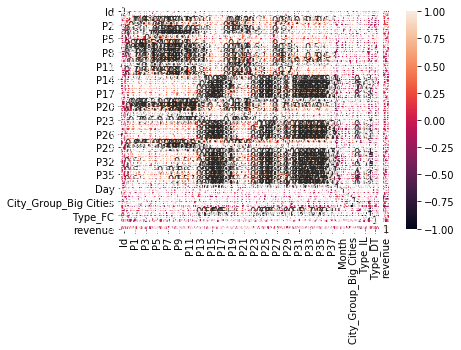

In [22]:
correlation_mat = train_df.corr()
sns.heatmap(correlation_mat, annot = True)

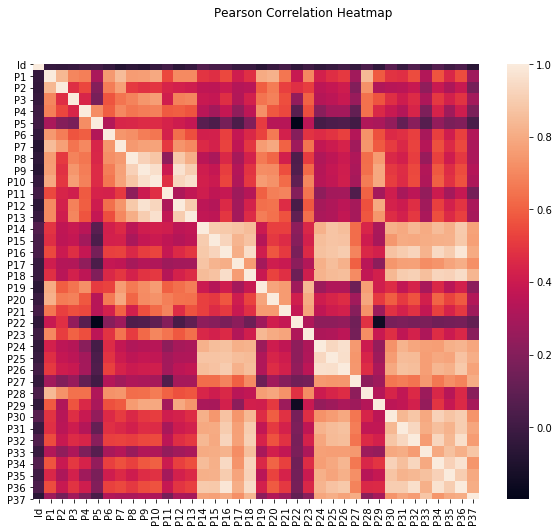

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.drop(['revenue','City Group','Type'], axis=1).corr(), square=True)
plt.suptitle('Pearson Correlation Heatmap')
plt.show()

In [21]:
c = train_df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
cleanedList = [x for x in so if str(x) != 'nan']
top200 = so[-157:-147]
print(top200)

P26      P24        0.965399
P24      P26        0.965399
P34      P36        0.970234
P36      P34        0.970234
P9       P12        0.971593
P12      P9         0.971593
P36      P16        0.981550
P16      P36        0.981550
Type_IL  Type_FC    0.985308
Type_FC  Type_IL    0.985308
dtype: float64


## Prediction Model

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error

from math import sqrt

In [23]:
train_df['revenue'] = np.log1p(train_df['revenue'])
X = train_df.drop(["revenue", "Id", "City"], axis=1)
X.info()
# X = train_df[["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10",
#             "P11","P12","P13","P14","P15","P16","P17","P18","P19","P20",
#             "P21","P22","P23","P24","P25","P26","P27","P28","P29","P30",
#             "P31","P32","P33","P34","P35","P36","P37"]]
y = train_df["revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 46 columns):
P1                       137 non-null int32
P2                       137 non-null int32
P3                       137 non-null int32
P4                       137 non-null int32
P5                       137 non-null int32
P6                       137 non-null int32
P7                       137 non-null int32
P8                       137 non-null int32
P9                       137 non-null int32
P10                      137 non-null int32
P11                      137 non-null int32
P12                      137 non-null int32
P13                      137 non-null int32
P14                      137 non-null int32
P15                      137 non-null int32
P16                      137 non-null int32
P17                      137 non-null int32
P18                      137 non-null int32
P19                      137 non-null int32
P20                      137 non-null int32
P21            

#### Baseline Model

In [24]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mse_linreg = mean_squared_error(y_test, y_pred)
rmse_linreg = sqrt(mean_squared_error(y_test, y_pred))
print(y_pred[:5])
print(y_test[:5])
print(mse_linreg)
print(rmse_linreg)

[15.44847258 15.42621132 15.13100215 15.02709913 15.25022892]
129    15.186642
1      15.750379
13     15.385739
53     15.537432
101    15.375438
Name: revenue, dtype: float64
0.4563847322840605
0.6755625302546467


In [25]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = sqrt(mean_squared_error(y_test, y_pred))
print(y_pred[:5])
print(y_test[:5])
print(mse_rf)
print(rmse_rf)

[15.40119557 15.40819141 15.3421936  14.95804941 15.33936967]
129    15.186642
1      15.750379
13     15.385739
53     15.537432
101    15.375438
Name: revenue, dtype: float64
0.2401817209794263
0.4900833816601276


In [26]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = sqrt(mean_squared_error(y_test, y_pred))
print(y_pred[:5])
print(y_test[:5])
print(mse_xgb)
print(rmse_xgb)

[15.875209 15.226612 15.249107 14.690914 15.416356]
129    15.186642
1      15.750379
13     15.385739
53     15.537432
101    15.375438
Name: revenue, dtype: float64
0.285648344103171
0.534460797536331


In [32]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
mse_lgbm = mean_squared_error(y_test, y_pred)
rmse_lgbm = sqrt(mean_squared_error(y_test, y_pred))
print(y_pred[:5])
print(y_test[:5])
print(mse_lgbm)
print(rmse_lgbm)

[15.58660017 15.34984327 15.27093627 15.11096392 14.98699269]
129    15.186642
1      15.750379
13     15.385739
53     15.537432
101    15.375438
Name: revenue, dtype: float64
0.23860546337944322
0.4884725820140197


In [63]:
# params_lgbm = {
#     'learning_rate': [.01, .1, .5, .7, .9, .95, .99, 1],
#     'boosting': ['gbdt'],
#     'metric': ['l1'],
#     'feature_fraction': [.3, .4, .5, 1],
#     'num_leaves': [20],
#     'min_data': [10],
#     'max_depth': [10],
#     'n_estimators': [10, 30, 50, 100]
# }

lgbm = LGBMRegressor(boosting_type="gbdt", learning_rate=0.01, num_leaves=20, max_depth=10, n_estimators=50)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
mse_lgbm = mean_squared_error(y_test, y_pred)
rmse_lgbm = sqrt(mean_squared_error(y_test, y_pred))
print(y_pred[:5])
print(y_test[:5])
print(mse_lgbm)
print(rmse_lgbm)

[15.323144   15.21363925 15.18903451 15.0764414  15.09719322]
129    15.186642
1      15.750379
13     15.385739
53     15.537432
101    15.375438
Name: revenue, dtype: float64
0.2009028538168763
0.4482218801184033


#### KFold Models

In [55]:
cv = RepeatedKFold(n_splits=10, n_repeats=2)
scores = cross_validate(LGBMRegressor(), X_train, y_train, scoring=["neg_mean_squared_error"], cv=cv)
rmse_fold_lgbm = scores['test_neg_mean_squared_error']
print(np.mean(rmse_fold_lgbm))

-0.22975393545613917


#### Ensembling Regressor

In [44]:
# from sklearn.datasets import make_regression
# from sklearn.model_selection import cross_val_score, RepeatedKFold
# from sklearn.ensemble import StackingRegressor

In [64]:
submission = pd.DataFrame(columns=['Id','Prediction'])
submission['Id'] = test_df['Id']

ridge_pred = lgbm.predict(test_df.drop(['Id', "City"], axis=1))
submission['Prediction'] = np.expm1(ridge_pred)
submission.to_csv('submission_lgbm.csv',index=False)